In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier

In [3]:
iris = datasets.load_iris()

In [4]:
X = iris.data[:, 2:]     # petal lenght, petal width
y = (iris.target == 2).astype(float)    # is Iris-Virginica

In [47]:
std = StandardScaler()

X_std = std.fit_transform(X)

In [49]:
def plot_decision(clf, X, y):
    
    assert X.shape[1] == 2
    x0_min, x0_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    x1_min, x1_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    
    X0, X1 = np.meshgrid(np.linspace(x0_min, x0_max, 500), np.linspace(x1_min, x1_max, 500))
    clf.fit(X, y)
    Y_pred = clf.predict(np.c_[X0.ravel(), X1.ravel()]).reshape(X0.shape)
    
    for cls, mark in zip(np.unique(y), 'bs go r^'.split()):
        plt.plot(X[y==cls, 0], X[y==cls, 1], mark, alpha=.7, label=cls)
    
    plt.contourf(X0, X1, Y_pred, alpha=.3, cmap=plt.cm.brg)
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.legend(loc='best')

#### Softmargin Classification

In [25]:
std_svc_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LinearSVC(C=1., loss='squared_hinge', dual=False))
])

In [26]:
std_svc_pipe.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [27]:
(y == std_svc_pipe.predict(X)).mean()

0.96

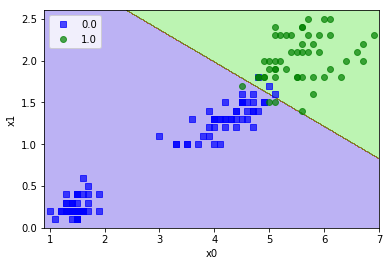

In [84]:
plot_decision(std_svc_pipe, X, y)

#### NonLinear SVM Classification

In [59]:
X_moon, y_moon = datasets.make_moons(n_samples=100, noise=.2)

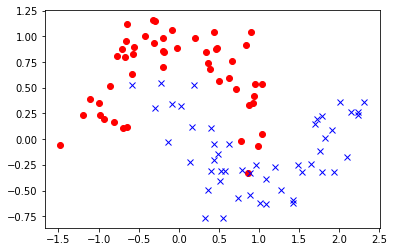

In [60]:
plt.plot(X_moon[y_moon==0, 0], X_moon[y_moon==0, 1], 'ro')
plt.plot(X_moon[y_moon==1, 0], X_moon[y_moon==1, 1], 'bx')

In [29]:
poly_std_svc_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svc', LinearSVC(C=1.0, loss='squared_hinge', dual=False))
])

In [30]:
poly_std_svc_pipe.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [31]:
(y == poly_std_svc_pipe.predict(X)).mean()

0.96

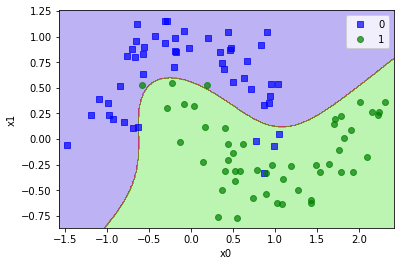

In [81]:
plot_decision(poly_std_svc_pipe, X_moon, y_moon)

Text(0.5,1,'Linear SVM + Polynomial features')

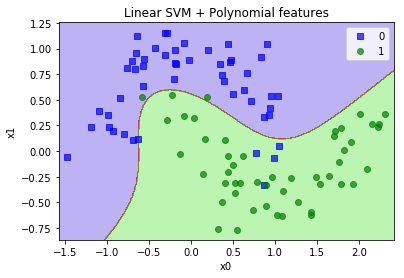

In [62]:
plot_decision(poly_std_svc_pipe, X_moon, y_moon)
plt.title('Linear SVM + Polynomial features')

#### Polynomial Kernel

Text(0.5,1,'Poly-kernel SVC')

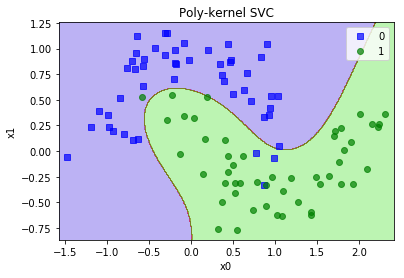

In [66]:
poly_kernel_svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(C=5.0, kernel='poly', degree=3, coef0=1))
])

plot_decision(poly_kernel_svm_pipe, X_moon, y_moon)
plt.title('Poly-kernel SVC')

#### Gaussian RBF Kernel

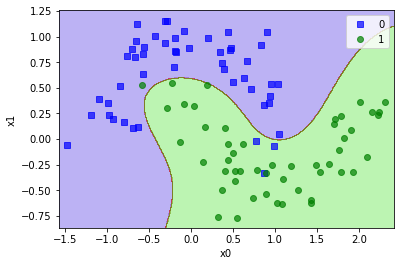

In [80]:
std_rbf_kernel_svc_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='rbf', C=10.0, gamma='auto'))
])

plot_decision(std_rbf_kernel_svc_pipe, X_moon, y_moon)

#### SVM Regression

In [90]:
from sklearn.svm import SVR, LinearSVR

In [88]:
# Linear dataset
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

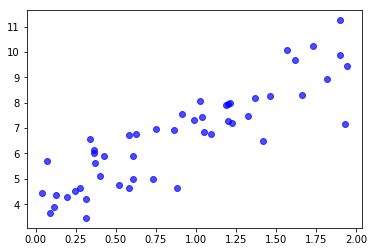

In [89]:
plt.plot(X, y, 'ob', alpha=.7)

In [105]:
svm_reg1 = LinearSVR(epsilon=1.5)
svm_reg1.fit(X, y)

svm_reg2 = LinearSVR(epsilon=0.5)
svm_reg2.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=0.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [115]:
def find_support_index(svm, X, y):
    y_pred = svm.predict(X)
    off_margin = np.abs(y - y_pred) >= svm.epsilon
    return np.argwhere(off_margin)

def plot_svm_regressor(svm, X, y, xlim=[0, 1]):
    xs = np.linspace(xlim[0], xlim[1], 100)[:, None]
    y_pred = svm.predict(xs)

    plt.plot(xs, y_pred, 'k-')
    plt.plot(xs, y_pred + svm.epsilon, 'k--')
    plt.plot(xs, y_pred - svm.epsilon, 'k--')
    plt.plot(X, y, 'bo', alpha=.7)
    plt.scatter(X[svm.support_], y[svm.support_], s=100, facecolors='#ffaaaa')
    plt.xlabel('x')
    plt.ylabel('y')

In [107]:
svm_reg1.support_ = find_support_index(svm_reg1, X, y)
svm_reg2.support_ = find_support_index(svm_reg2, X, y)

Text(0.5,1,'epsilon: 0.5')

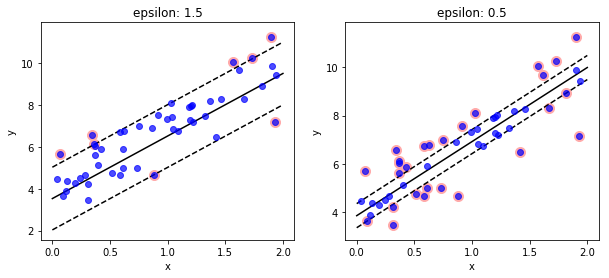

In [118]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plot_svm_regressor(svm_reg1, X, y, [0, 2])
plt.title('epsilon: {}'.format(svm_reg1.epsilon))

plt.subplot(122)
plot_svm_regressor(svm_reg2, X, y, [0, 2])
plt.title('epsilon: {}'.format(svm_reg2.epsilon))

In [119]:
# non-linear dataset
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [125]:
svr_C001 = SVR(kernel='poly', degree=2, epsilon=.1, C=.01)
svr_C100 = SVR(kernel='poly', degree=2, epsilon=.1, C=100)

svr_C001.fit(X, y)
svr_C100.fit(X, y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Text(0.5,1,'degree=2, C=100, epsilon=0.1')

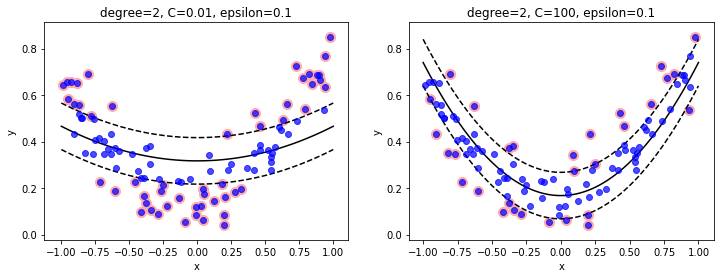

In [130]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plot_svm_regressor(svr_C001, X, y, [-1, 1])
plt.title("degree={degree}, C={C}, epsilon={epsilon}".format(**svr_C001.get_params()))

plt.subplot(122)
plot_svm_regressor(svr_C100, X, y, [-1, 1])
plt.title("degree={degree}, C={C}, epsilon={epsilon}".format(**svr_C100.get_params()))

In [127]:
svr_C001.degree, svr_C001.epsilon, svr_C001.C

(2, 0.1, 0.01)

In [128]:
svr_C001.get_params()

{'C': 0.01,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 2,
 'epsilon': 0.1,
 'gamma': 'auto',
 'kernel': 'poly',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

#### Exercises

In [35]:
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler

#### Ex8.

In [48]:
iris = load_iris()

In [49]:
X = iris.data[:, 2:]
y = iris.target 

serosa_or_vesicolor = np.logical_or(y==0, y==1)

In [50]:
X = X[serosa_or_vesicolor]
y = y[serosa_or_vesicolor]

X.shape, y.shape

((100, 2), (100,))

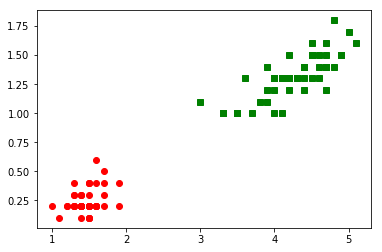

In [51]:
plt.plot(X[y==0, 0], X[y==0, 1], 'or')
plt.plot(X[y==1, 0], X[y==1, 1], 'gs')

In [52]:
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [53]:
C = 5
alpha = 1./(C * len(X))

lin_svc = LinearSVC(loss='hinge', C=C)
svc = SVC(C=C, kernel='linear')
sgd_svc = SGDClassifier(loss='hinge', learning_rate='constant', max_iter=1000, eta0=.01, alpha=alpha)

In [54]:
lin_svc.fit(X_std, y)
svc.fit(X_std, y)
sgd_svc.fit(X_std, y)

SGDClassifier(alpha=0.002, average=False, class_weight=None, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='hinge', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [55]:
lin_svc.coef_, lin_svc.intercept_

(array([[1.05542043, 1.09851643]]), array([0.28481415]))

In [56]:
svc.coef_, svc.intercept_

(array([[1.1223101 , 1.02531081]]), array([0.31933577]))

In [57]:
sgd_svc.coef_, sgd_svc.intercept_

(array([[1.12172962, 1.02704936]]), array([0.32]))

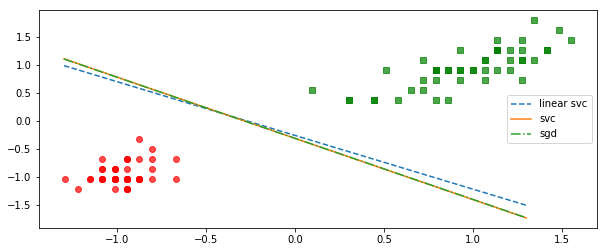

In [71]:
plt.figure(figsize=(10, 4))

plt.plot(X_std[y==0, 0], X_std[y==0, 1], 'ro', alpha=.7)
plt.plot(X_std[y==1, 0], X_std[y==1, 1], 'gs', alpha=.7)

xs = np.linspace(-1.3, 1.3, 100)

linsvc_decision = -(lin_svc.coef_[0, 0]*xs + lin_svc.intercept_[0] )/ lin_svc.coef_[0, 1]
svc_decision = -(svc.coef_[0, 0]*xs + svc.intercept_[0]) / svc.coef_[0, 1]
sgd_decision = -(sgd_svc.coef_[0, 0]*xs + sgd_svc.intercept_[0]) / sgd_svc.coef_[0, 1]

plt.plot(xs, linsvc_decision, '--', label='linear svc')
plt.plot(xs, svc_decision, '-', label='svc')
plt.plot(xs, sgd_decision, '-.', label='sgd')
plt.legend(loc='best')

#### Ex.9

In [18]:
from keras.datasets import mnist
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

from scipy import stats

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train = X_train.reshape((len(X_train), -1))
X_test = X_test.reshape((len(X_test), -1))

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [5]:
# linear SVC
lin_svc = LinearSVC(random_state=42)
lin_svc.fit(X_train[:10000], y_train[:10000])

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

In [6]:
accuracy_score(y_train[10000:], lin_svc.predict(X_train[10000:]))

0.8518

In [7]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train.astype(float))
X_test_std = sc.transform(X_test.astype(float))

In [8]:
# scale range [0, 1]
X_train_mm = X_train.astype(float) / 255.
X_test_mm = X_test.astype(float) / 255.

In [9]:
# linear SVC + std
lin_svc.fit(X_train_std[:5000], y_train[:5000])
accuracy_score(y_train[5000:], lin_svc.predict(X_train_std[5000:]))

0.8165818181818182

In [10]:
# linear SVC + MinMax
lin_svc.fit(X_train_mm[:5000], y_train[:5000])
accuracy_score(y_train[5000:], lin_svc.predict(X_train_mm[5000:]))

0.8661454545454546

In [11]:
# RBF SVC
rbf_svc = SVC(random_state=42)
rbf_svc.fit(X_train_std[:1000], y_train[:1000])
accuracy_score(y_train[1000:], rbf_svc.predict(X_train_std[1000:]))

0.8630338983050847

In [32]:
gamma = stats.reciprocal(0.001, 0.1)
C = stats.uniform(1, 20)

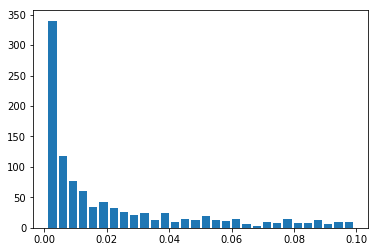

In [17]:
plt.hist(gamma.rvs(size=1000), bins=30, rwidth=.8)
plt.show()

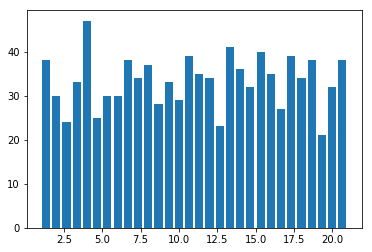

In [40]:
plt.hist(C.rvs(1000), bins=30, rwidth=.8)
plt.show()

In [41]:
params = {
    'gamma': stats.reciprocal(.001, .1),
    'C': stats.uniform(1, 20),
}


svc_rnd_grid = RandomizedSearchCV(SVC(kernel='rbf'), params, n_iter=30, 
                                  cv=3, verbose=2, return_train_score=True)

In [42]:
svc_rnd_grid.fit(X_train_std[:1000], y_train[:1000])

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] gamma=0.030297230589296384, C=6.435037836571275 .................
[CV] .. gamma=0.030297230589296384, C=6.435037836571275, total=   0.9s
[CV] gamma=0.030297230589296384, C=6.435037836571275 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] .. gamma=0.030297230589296384, C=6.435037836571275, total=   0.9s
[CV] gamma=0.030297230589296384, C=6.435037836571275 .................
[CV] .. gamma=0.030297230589296384, C=6.435037836571275, total=   0.9s
[CV] gamma=0.05589691075855566, C=1.862695779130056 ..................
[CV] ... gamma=0.05589691075855566, C=1.862695779130056, total=   0.9s
[CV] gamma=0.05589691075855566, C=1.862695779130056 ..................
[CV] ... gamma=0.05589691075855566, C=1.862695779130056, total=   0.9s
[CV] gamma=0.05589691075855566, C=1.862695779130056 ..................
[CV] ... gamma=0.05589691075855566, C=1.862695779130056, total=   1.1s
[CV] gamma=0.002349675521454126, C=17.80783559585079 .................
[CV] .. gamma=0.002349675521454126, C=17.80783559585079, total=   0.8s
[CV] gamma=0.002349675521454126, C=17.80783559585079 .................
[CV] .. gamma=0.002349675521454126, C=17.80783559585079, total=   0.8s
[CV] gamma=0.002349675521454126, C=17.80783559585079 .................
[CV] .

[CV] . gamma=0.0016966239715960217, C=3.160830749624769, total=   0.7s
[CV] gamma=0.03177132618930142, C=5.044875594662722 ..................
[CV] ... gamma=0.03177132618930142, C=5.044875594662722, total=   1.0s
[CV] gamma=0.03177132618930142, C=5.044875594662722 ..................
[CV] ... gamma=0.03177132618930142, C=5.044875594662722, total=   1.0s
[CV] gamma=0.03177132618930142, C=5.044875594662722 ..................
[CV] ... gamma=0.03177132618930142, C=5.044875594662722, total=   1.0s
[CV] gamma=0.05368650000183819, C=2.6761056060923196 .................
[CV] .. gamma=0.05368650000183819, C=2.6761056060923196, total=   1.0s
[CV] gamma=0.05368650000183819, C=2.6761056060923196 .................
[CV] .. gamma=0.05368650000183819, C=2.6761056060923196, total=   1.0s
[CV] gamma=0.05368650000183819, C=2.6761056060923196 .................
[CV] .. gamma=0.05368650000183819, C=2.6761056060923196, total=   1.0s
[CV] gamma=0.0037057223072968666, C=10.346009936612196 ...............
[CV]  

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  2.2min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=30, n_jobs=1,
          param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027D27699128>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027D27699390>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=2)

In [43]:
svc_rnd_grid.best_params_, svc_rnd_grid.best_score_

({'C': 12.941714223184917, 'gamma': 0.001409732308315698}, 0.863)

In [44]:
cv_result = pd.DataFrame(svc_rnd_grid.cv_results_)

In [45]:
cv_result.sort_values(by='rank_test_score')

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
7,0.613602,0.188031,0.863,1.000000,12.9417,0.00140973,"{'gamma': 0.001409732308315698, 'C': 12.941714...",1,0.872024,1.000000,0.858859,1.000000,0.858006,1.000000,0.003773,0.008431,0.006429,0.000000
19,0.631484,0.193235,0.858,1.000000,3.16083,0.00169662,"{'gamma': 0.0016966239715960217, 'C': 3.160830...",2,0.869048,1.000000,0.849850,1.000000,0.854985,1.000000,0.008989,0.004233,0.008132,0.000000
28,0.535491,0.184782,0.853,0.987496,1.46452,0.00128869,"{'gamma': 0.0012886902781679291, 'C': 1.464516...",3,0.857143,0.986446,0.849850,0.986507,0.851964,0.989537,0.014539,0.002550,0.003070,0.001443
26,0.654218,0.189677,0.852,1.000000,7.24726,0.00194386,"{'gamma': 0.0019438563953624612, 'C': 7.247261...",4,0.866071,1.000000,0.840841,1.000000,0.848943,1.000000,0.021163,0.001208,0.010540,0.000000
5,0.678994,0.199107,0.851,1.000000,18.5286,0.00214724,"{'gamma': 0.0021472449624881326, 'C': 18.52863...",5,0.863095,1.000000,0.837838,1.000000,0.851964,1.000000,0.004372,0.003490,0.010351,0.000000
2,0.724275,0.211647,0.847,1.000000,17.8078,0.00234968,"{'gamma': 0.002349675521454126, 'C': 17.807835...",6,0.857143,1.000000,0.843844,1.000000,0.839879,1.000000,0.007477,0.004106,0.007394,0.000000
22,0.778848,0.211807,0.792,1.000000,10.346,0.00370572,"{'gamma': 0.0037057223072968666, 'C': 10.34600...",7,0.800595,1.000000,0.786787,1.000000,0.788520,1.000000,0.008396,0.004996,0.006155,0.000000
4,0.816276,0.219587,0.772,1.000000,10.0795,0.00435878,"{'gamma': 0.004358776804207333, 'C': 10.079481...",8,0.785714,1.000000,0.756757,1.000000,0.773414,1.000000,0.010989,0.009060,0.011884,0.000000
23,0.820827,0.219589,0.747,1.000000,8.93918,0.00529374,"{'gamma': 0.0052937356237675315, 'C': 8.939182...",9,0.770833,1.000000,0.732733,1.000000,0.737160,1.000000,0.017806,0.004424,0.017050,0.000000
14,0.869616,0.225782,0.704,1.000000,6.33371,0.00678404,"{'gamma': 0.006784036248414888, 'C': 6.3337125...",10,0.741071,1.000000,0.711712,1.000000,0.658610,1.000000,0.019568,0.003931,0.034110,0.000000


In [46]:
best_svc = svc_rnd_grid.best_estimator_

In [47]:
best_svc.fit(X_train_std, y_train)

SVC(C=12.941714223184917, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001409732308315698,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [48]:
# train score
accuracy_score(y_train, best_svc.predict(X_train_std))

0.99965

In [49]:
# test score
accuracy_score(y_test, best_svc.predict(X_test_std))

0.9727

In [50]:
from sklearn.externals.joblib import dump

In [52]:
dump(best_svc, 'best_svc_mnist.pkl')

['best_svc_mnist.pkl']

#### Ex.10

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR, SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import reciprocal, uniform

In [3]:
housing = datasets.fetch_california_housing()

In [7]:
X = housing.data
y = housing.target

X.shape, y.shape

((20640, 8), (20640,))

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16512, 8), (16512,), (4128, 8), (4128,))

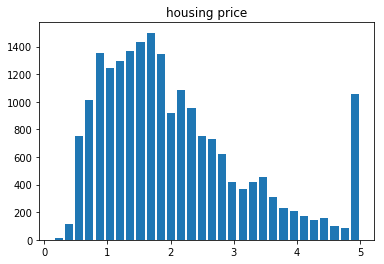

In [10]:
plt.hist(y, bins=30, rwidth=.8)
plt.title('housing price')
plt.show()

In [12]:
X_df = pd.DataFrame(X, columns=housing.feature_names)

In [13]:
X_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [14]:
X_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


#### [data type]: (Norminal, Ordinal, Interval, Ratio) 

* MedInc - ratio
* HouseAge - ratio
* AveRooms - ratio
* Population - ratio
* AveOccup - ratio
* Latitude - interval
* Longitude - interval

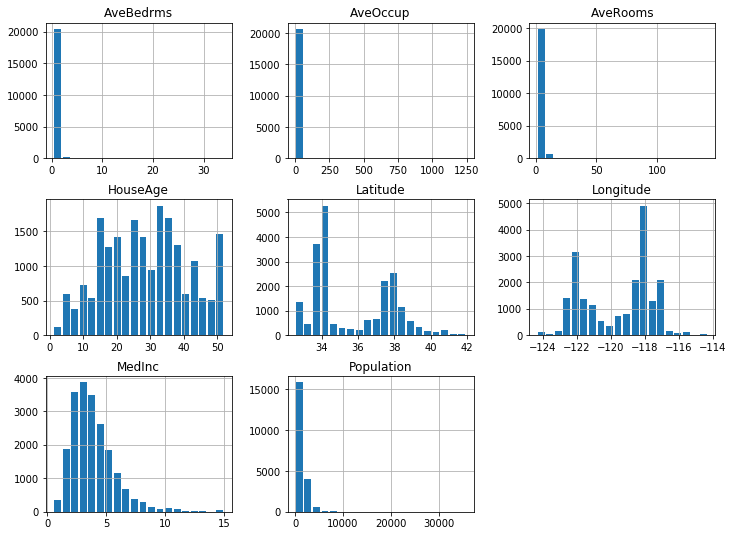

In [18]:
_ = X_df.hist(figsize=(12, 9), bins=20, rwidth=.8)

In [26]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [28]:
# linear svm
lin_svr = LinearSVR(random_state=42)
lin_svr.fit(X_train_std, y_train)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0)

In [29]:
lin_tr_mse = mean_squared_error(y_train, lin_svr.predict(X_train_std))
lin_tr_mse

0.9612806653297273

In [30]:
# rmse
np.sqrt(lin_tr_mse)

0.9804492160890983

In [38]:
# SVR: tuning C and gamma
svr = SVR(kernel='rbf')

gamma = reciprocal(.001, .1)
C = uniform(1, 20)

params = {
    'gamma': gamma,
    'C': C,
}

svr_grid = RandomizedSearchCV(svr, params, cv=3, n_iter=10, 
                              random_state=42, verbose=2)

svr_grid.fit(X_train_std, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] gamma=0.07969454818643928, C=8.49080237694725 ...................
[CV] .... gamma=0.07969454818643928, C=8.49080237694725, total=  14.4s
[CV] gamma=0.07969454818643928, C=8.49080237694725 ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.5s remaining:    0.0s


[CV] .... gamma=0.07969454818643928, C=8.49080237694725, total=  14.7s
[CV] gamma=0.07969454818643928, C=8.49080237694725 ...................
[CV] .... gamma=0.07969454818643928, C=8.49080237694725, total=  12.5s
[CV] gamma=0.015751320499779724, C=15.639878836228101 ................
[CV] . gamma=0.015751320499779724, C=15.639878836228101, total=  14.0s
[CV] gamma=0.015751320499779724, C=15.639878836228101 ................
[CV] . gamma=0.015751320499779724, C=15.639878836228101, total=  12.2s
[CV] gamma=0.015751320499779724, C=15.639878836228101 ................
[CV] . gamma=0.015751320499779724, C=15.639878836228101, total=  13.9s
[CV] gamma=0.002051110418843397, C=4.12037280884873 ..................
[CV] ... gamma=0.002051110418843397, C=4.12037280884873, total=  11.1s
[CV] gamma=0.002051110418843397, C=4.12037280884873 ..................
[CV] ... gamma=0.002051110418843397, C=4.12037280884873, total=  10.9s
[CV] gamma=0.002051110418843397, C=4.12037280884873 ..................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  8.0min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020812BCCF98>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000208135970F0>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [39]:
svr_grid.best_params_, svr_grid.best_score_

({'C': 8.49080237694725, 'gamma': 0.07969454818643928}, 0.7439503411121666)

In [40]:
# train mse
best_mse = mean_squared_error(y_train, svr_grid.predict(X_train_std))
best_mse, np.sqrt(best_mse)

(0.31856709704690617, 0.5644174847104811)

In [41]:
# test mse
test_mse = mean_squared_error(y_test, svr_grid.best_estimator_.predict(X_test_std))
test_mse, np.sqrt(test_mse)

(0.34397170626566426, 0.5864910112402953)

In [43]:
# number of support vectors
svr_grid.best_estimator_.support_.shape

(12778,)

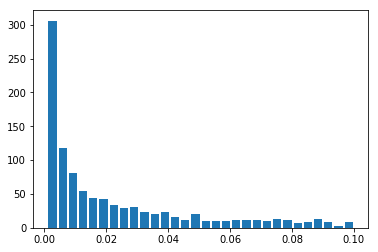

In [35]:
plt.hist(gamma.rvs(1000), bins=30, rwidth=.8)
plt.show()

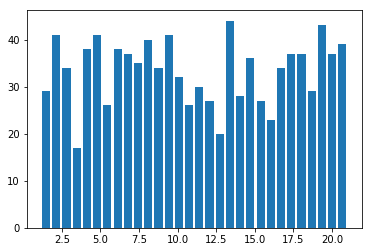

In [36]:
plt.hist(C.rvs(1000), bins=30, rwidth=.8)
plt.show()